In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.set_index("EmployeeNumber", drop=True, inplace=True)

In [8]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


In [9]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [22]:
df[["MonthlyRate", "DailyRate", "MonthlyIncome", "HourlyRate"]]

,MonthlyRate,DailyRate,MonthlyIncome,HourlyRate
EmployeeNumber,,,,
1,19479,1102,5993,94
2,24907,279,5130,61
4,2396,1373,2090,92
5,23159,1392,2909,56
7,16632,591,3468,40
...,...,...,...,...
2061,12290,884,2571,41
2062,21457,613,9991,42
2064,5174,155,6142,87


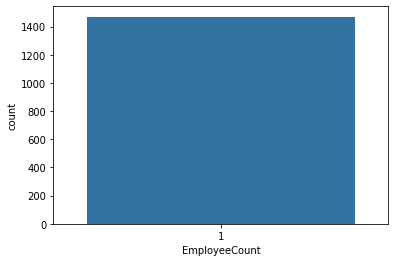

In [24]:
sns.countplot(data=df, x="EmployeeCount")

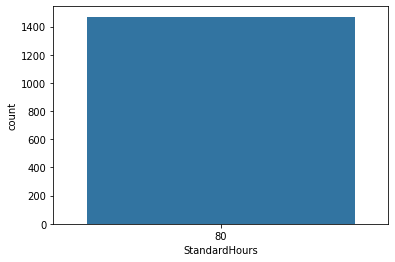

In [25]:
sns.countplot(data=df, x="StandardHours")

In [26]:
df.drop(df[["MonthlyRate", "DailyRate", "HourlyRate", "EmployeeCount", "StandardHours"]], axis = 1, inplace=True)

In [27]:
df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
8,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,4,Male,3,...,3,3,0,8,2,2,7,7,3,6
10,59,No,Travel_Rarely,Research & Development,3,3,Medical,3,Female,4,...,4,1,3,12,3,2,1,0,0,0
11,30,No,Travel_Rarely,Research & Development,24,1,Life Sciences,4,Male,3,...,4,2,1,1,2,3,1,0,0,0
12,38,No,Travel_Frequently,Research & Development,23,3,Life Sciences,4,Male,2,...,4,2,0,10,2,3,9,7,1,8


In [29]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

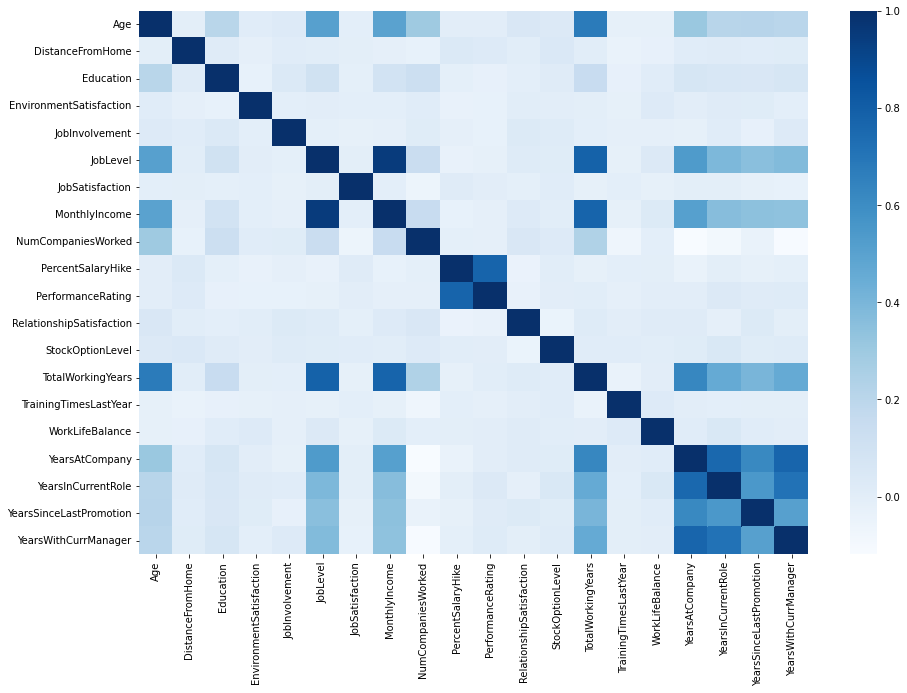

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="Blues")

In [42]:
df.select_dtypes(include = ["object"]).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [46]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[df.select_dtypes(include = ["object"]).columns] = oe.fit_transform(df[df.select_dtypes(include = ["object"]).columns])

In [49]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1.0,2.0,2.0,1,2,1.0,2,0.0,3,...,3,1,0,8,0,1,6,4,0,5
2,49,0.0,1.0,1.0,8,1,1.0,3,1.0,2,...,4,4,1,10,3,3,10,7,1,7
4,37,1.0,2.0,1.0,2,2,4.0,4,1.0,2,...,3,2,0,7,3,3,0,0,0,0
5,33,0.0,1.0,1.0,3,4,1.0,4,0.0,3,...,3,3,0,8,3,3,8,7,3,0
7,27,0.0,2.0,1.0,2,1,3.0,1,1.0,3,...,3,4,1,6,3,3,2,2,2,2


In [53]:
x = df.drop(columns = ["Attrition"])
y = df[["Attrition"]]

In [54]:
x

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,2.0,2.0,1,2,1.0,2,0.0,3,2,...,3,1,0,8,0,1,6,4,0,5
2,49,1.0,1.0,8,1,1.0,3,1.0,2,2,...,4,4,1,10,3,3,10,7,1,7
4,37,2.0,1.0,2,2,4.0,4,1.0,2,1,...,3,2,0,7,3,3,0,0,0,0
5,33,1.0,1.0,3,4,1.0,4,0.0,3,1,...,3,3,0,8,3,3,8,7,3,0
7,27,2.0,1.0,2,1,3.0,1,1.0,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,1.0,1.0,23,2,3.0,3,1.0,4,2,...,3,3,1,17,3,3,5,2,0,3
2062,39,2.0,1.0,6,1,3.0,4,1.0,2,3,...,3,1,1,9,5,3,7,7,1,7
2064,27,2.0,1.0,4,3,1.0,2,1.0,4,2,...,4,2,1,6,0,3,6,2,0,3


In [55]:
y

,Attrition
EmployeeNumber,
1,1.0
2,0.0
4,1.0
5,0.0
7,0.0
...,...
2061,0.0
2062,0.0
2064,0.0


In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state = 1, stratify=y)

In [72]:
from sklearn.metrics import accuracy_score, classification_report
def mymodel(model):
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)

  train = model.score(xtrain, ytrain)
  test = model.score(xtest, ytest)

  print(f"Training Accuracy: {train}\nTesting Accuracy: {test}")

  ac = accuracy_score(ytest, ypred)
  cr = classification_report(ytest, ypred)

  print(f"Accuracy: {ac}\n\nClassificatio Report: \n{cr}")
  return model

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [74]:
mymodel(LogisticRegression())

Training Accuracy: 0.8503401360544217
Testing Accuracy: 0.8367346938775511
Accuracy: 0.8367346938775511

Classificatio Report: 
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       370
         1.0       0.46      0.08      0.14        71

    accuracy                           0.84       441
   macro avg       0.65      0.53      0.53       441
weighted avg       0.79      0.84      0.79       441



LogisticRegression()

In [76]:
y.value_counts()

Attrition
0.0          1233
1.0           237
dtype: int64

In [80]:
mymodel(RandomForestClassifier(n_estimators = 15))

Training Accuracy: 0.9902818270165209
Testing Accuracy: 0.8616780045351474
Accuracy: 0.8616780045351474

Classificatio Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       370
         1.0       0.65      0.31      0.42        71

    accuracy                           0.86       441
   macro avg       0.76      0.64      0.67       441
weighted avg       0.84      0.86      0.84       441



RandomForestClassifier(n_estimators=15)

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [89]:
mymodel(SVC(kernel="sigmoid"))

Training Accuracy: 0.8454810495626822
Testing Accuracy: 0.873015873015873
Accuracy: 0.873015873015873

Classificatio Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       370
         1.0       0.73      0.34      0.46        71

    accuracy                           0.87       441
   macro avg       0.81      0.66      0.69       441
weighted avg       0.86      0.87      0.85       441



SVC(kernel='sigmoid')

In [84]:
mymodel(RandomForestClassifier())

Training Accuracy: 1.0
Testing Accuracy: 0.8639455782312925
Accuracy: 0.8639455782312925

Classificatio Report: 
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       370
         1.0       0.72      0.25      0.38        71

    accuracy                           0.86       441
   macro avg       0.80      0.62      0.65       441
weighted avg       0.85      0.86      0.84       441



RandomForestClassifier()

In [92]:
parameters = {
    "kernel": ["sigmoid"],
    "C": [.1,1,10,100,1000,10000,100000]
}

In [93]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), parameters, cv = 5, verbose = 3)

In [94]:
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.840 total time=   0.0s
[CV 2/5] END .............C=0.1, kernel=sigmoid;, score=0.840 total time=   0.0s
[CV 3/5] END .............C=0.1, kernel=sigmoid;, score=0.840 total time=   0.0s
[CV 4/5] END .............C=0.1, kernel=sigmoid;, score=0.835 total time=   0.0s
[CV 5/5] END .............C=0.1, kernel=sigmoid;, score=0.839 total time=   0.0s
[CV 1/5] END ...............C=1, kernel=sigmoid;, score=0.840 total time=   0.0s
[CV 2/5] END ...............C=1, kernel=sigmoid;, score=0.830 total time=   0.1s
[CV 3/5] END ...............C=1, kernel=sigmoid;, score=0.845 total time=   0.1s
[CV 4/5] END ...............C=1, kernel=sigmoid;, score=0.845 total time=   0.1s
[CV 5/5] END ...............C=1, kernel=sigmoid;, score=0.868 total time=   0.0s
[CV 1/5] END ..............C=10, kernel=sigmoid;, score=0.806 total time=   0.0s
[CV 2/5] END ..............C=10, kernel=sigmoid;,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'kernel': ['sigmoid']},
             verbose=3)

In [97]:
grid.best_score_

0.8455031967795407

In [98]:
grid.best_params_

{'C': 1, 'kernel': 'sigmoid'}

In [96]:
grid.best_estimator_

SVC(C=1, kernel='sigmoid')

In [99]:
mymodel(grid.best_estimator_)

Training Accuracy: 0.8454810495626822
Testing Accuracy: 0.873015873015873
Accuracy: 0.873015873015873

Classificatio Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       370
         1.0       0.73      0.34      0.46        71

    accuracy                           0.87       441
   macro avg       0.81      0.66      0.69       441
weighted avg       0.86      0.87      0.85       441



SVC(C=1, kernel='sigmoid')

In [102]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1,50, 10)),
    "min_samples_leaf": list(range(1,50, 10))
}

In [103]:
grid = GridSearchCV(RandomForestClassifier(), parameters, verbose=2)
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.1s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.2s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.1s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.2s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.2s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.2s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.2s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.2s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=21; total time=   0.1s
[CV] END ...criterion=gini, max_depth=1, min_sa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 11, 21, 31, 41],
                         'min_samples_leaf': [1, 11, 21, 31, 41]},
             verbose=2)

In [104]:
grid.best_score_

0.8503528297418896

In [105]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 1}

In [109]:
grid.best_estimator_

RandomForestClassifier(max_depth=31)

In [108]:
mymodel(grid.best_estimator_)

Training Accuracy: 1.0
Testing Accuracy: 0.8662131519274376
Accuracy: 0.8662131519274376

Classificatio Report: 
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       370
         1.0       0.77      0.24      0.37        71

    accuracy                           0.87       441
   macro avg       0.82      0.61      0.65       441
weighted avg       0.86      0.87      0.84       441



RandomForestClassifier(max_depth=31)